**Logistic Regression** is a **statistical method** used for **binary classification tasks**, such as predicting customer churn, identifying email spam, and detecting credit card fraud transactions. In the case of customer churn, logistic regression estimates probabilities and analyzes relationships between features to understand which factors influence churn. This helps businesses identify critical factors affecting customer retention, facilitating efforts to reduce churn rates.

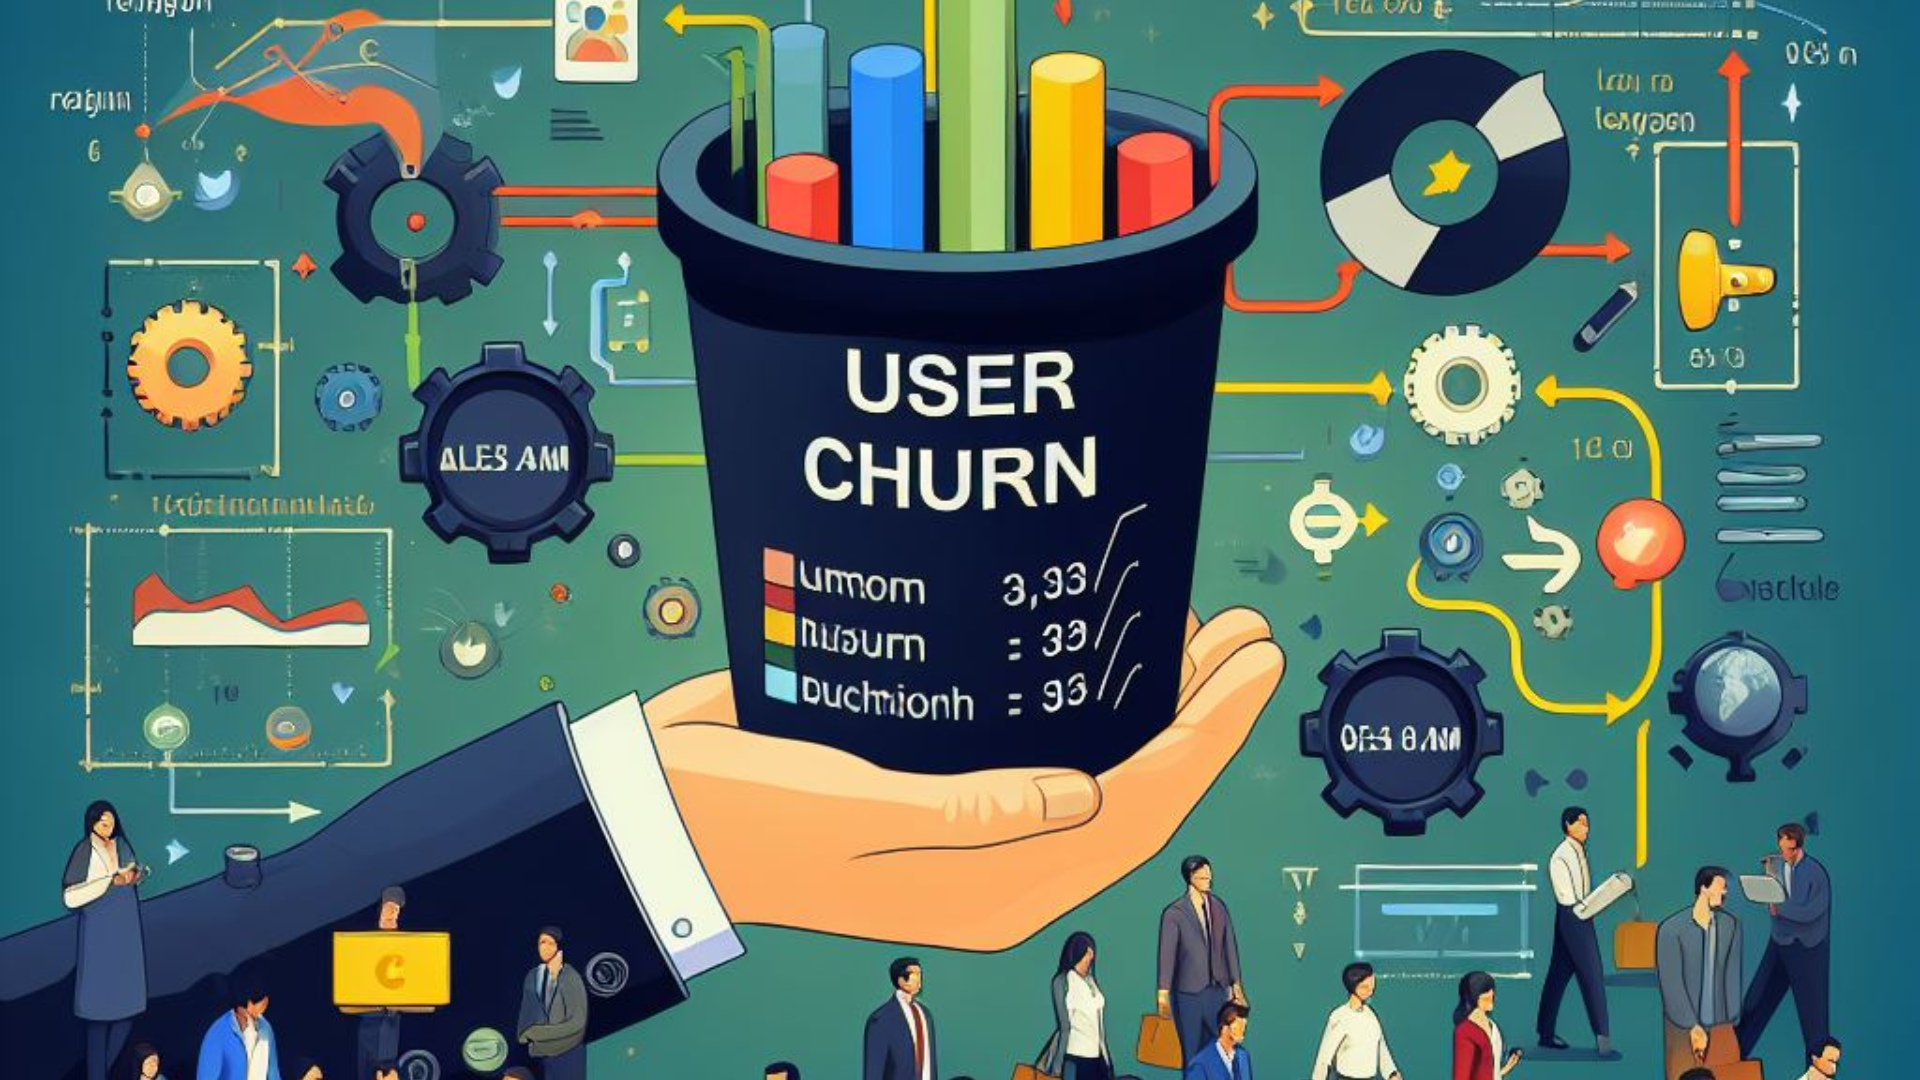

In [1]:
from IPython.display import Image
Image("../input/logistic-regression/Hypothesis  (5).png")  

### **Welcome to the Waze User Churn Prediction Project!**
Our objective is to develop a **Logistic Regression Model** using the Waze dataset to predict user churn. Prior to this, we conducted extensive [**Exploratory Data Analysis**](https://www.kaggle.com/code/lekhatopil/waze-exploratory-data-analysis) and [**Hypothesis Testing**](https://www.kaggle.com/code/lekhatopil/hypotheses-two-sample-t-tests-chi-squared-test) to lay the groundwork for our predictive modeling efforts.

# **About the Company**
**Waze**, a free navigation app owned by Google, makes it easier for drivers around the world to reach their destinations. Waze's community of map editors, beta testers, translators, partners, and users helps make each drive better and safer.

# **Project Goal**
The primary goal of this project is to develop a machine learning model to predict user churn. An accurate model will help prevent churn, improve user retention, and contribute to the growth of Waze's business.

## **Project Focus:**
In this project, our primary focus is on building and evaluating a **Binomial Logistic Regression Model** for **predicting churn**. We will assess the model's performance using key metrics such as accuracy, precision, recall, and F1 score. Additionally, we will analyze the confusion matrix to gain insights into model performance and conduct feature analysis to identify the factors that contribute significantly to user churn.

This project is part of the Google Advanced Data Analytics program, and the dataset used is curated by Google as part of this program.

## **Churn V/s Retained:**
Churn refers to users who have uninstalled the Waze app, whereas Retained users are those who continue to engage with the app and have not uninstalled it.

In [2]:
# Import standard operational packages
import pandas as pd
import numpy as np

# Packages for visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Packages for Logistic Regression & Confusion Matrix
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, \
precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.linear_model import LogisticRegression

import warnings
warnings.filterwarnings('ignore', category=DeprecationWarning)
warnings.simplefilter(action='ignore', category=FutureWarning)

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/waze-dataset-to-predict-user-churn/waze_dataset.csv
/kaggle/input/logistic-regression/Hypothesis  (5).png


In [3]:
# Read Data
df = pd.read_csv('../input/waze-dataset-to-predict-user-churn/waze_dataset.csv', encoding = 'unicode_escape')

In [4]:
df.head()

ID     label  sessions  drives  total_sessions  n_days_after_onboarding  \
0   0  retained       283     226      296.748273                     2276   
1   1  retained       133     107      326.896596                     1225   
2   2  retained       114      95      135.522926                     2651   
3   3  retained        49      40       67.589221                       15   
4   4  retained        84      68      168.247020                     1562   

   total_navigations_fav1  total_navigations_fav2  driven_km_drives  \
0                     208                       0       2628.845068   
1                      19                      64      13715.920550   
2                       0                       0       3059.148818   
3                     322                       7        913.591123   
4                     166                       5       3950.202008   

   duration_minutes_drives  activity_days  driving_days   device  
0              1985.775061             28            19  Android  
1              3160.472914             13            11   iPhone  
2              1610.735904             14             8  Android  
3               587.196542              7             3   iPhone  
4              1219.555924             27            18  Android

In [5]:
df.shape

(14999, 13)

In [6]:
# Drop `ID` column
df.drop('ID', axis=1, inplace=True)

We will exclude the **`ID`** column from our dataset as it does not contribute to predicting churn. Next, we will calculate the percentage of class balance for our target variable **`labels`** (**churned and retained**). This will help us understand the distribution of our data and guide our modeling strategy.

In [7]:
# Check class balance of the dependent (target) variable - `label`
df['label'].value_counts(normalize=True) * 100

label
retained    82.264494
churned     17.735506
Name: proportion, dtype: float64

The dataset shows a class imbalance, with **82%** of users labeled as retained and **17.73%** labeled as churned. While logistic regression can handle class imbalance to some extent, proceeding without sampling modification initially is reasonable.

In [8]:
# Descriptive Statistic
df.describe()

sessions        drives  total_sessions  n_days_after_onboarding  \
count  14999.000000  14999.000000    14999.000000             14999.000000   
mean      80.633776     67.281152      189.964447              1749.837789   
std       80.699065     65.913872      136.405128              1008.513876   
min        0.000000      0.000000        0.220211                 4.000000   
25%       23.000000     20.000000       90.661156               878.000000   
50%       56.000000     48.000000      159.568115              1741.000000   
75%      112.000000     93.000000      254.192341              2623.500000   
max      743.000000    596.000000     1216.154633              3500.000000   

       total_navigations_fav1  total_navigations_fav2  driven_km_drives  \
count            14999.000000            14999.000000      14999.000000   
mean               121.605974               29.672512       4039.340921   
std                148.121544               45.394651       2502.149334   
min                  0.000000                0.000000         60.441250   
25%                  9.000000                0.000000       2212.600607   
50%                 71.000000                9.000000       3493.858085   
75%                178.000000               43.000000       5289.861262   
max               1236.000000              415.000000      21183.401890   

       duration_minutes_drives  activity_days  driving_days  
count             14999.000000   14999.000000  14999.000000  
mean               1860.976012      15.537102     12.179879  
std                1446.702288       9.004655      7.824036  
min                  18.282082       0.000000      0.000000  
25%                 835.996260       8.000000      5.000000  
50%                1478.249859      16.000000     12.000000  
75%                2464.362632      23.000000     19.000000  
max               15851.727160      31.000000     30.000000

* Based on our prior [**Exploratory Data Analysis (EDA)**](https://www.kaggle.com/code/lekhatopil/waze-exploratory-data-analysis), we identified several variables exhibiting heavy right-skewness and outliers. To prepare for building our logistic regression model, we plan to address these outliers by applying appropriate percentile threshold imputation later in the notebook.

#### **The following columns have outliers:**
* **`sessions`**
* **`drives`**
* **`total_sessions`**
* **`total_navigations_fav1`**
* **`total_navigations_fav2`**
* **`driven_km_drives`**
* **`duration_minutes_drives`**



# **Create Features**
## **`km_per_driving_day`**

* Our next step involves creating a new feature called **`km_per_driving_day`**, which calculates the mean distance driven per driving day for each user by dividing the total driven kilometers (**`driven_km_drives`**) by the number of driving days (**`driving_days`**).

* This new feature aims to capture the average driving behavior of users and could potentially provide valuable insights for predicting churn.

* During prior [**Exploratory Data Analysis (EDA)**](https://www.kaggle.com/code/lekhatopil/waze-exploratory-data-analysis), we observed a **positive correlation** between **`km_per_driving_day`** and churn rate, suggesting that users who drive longer distances per driving day are more likely to churn.

In [9]:
# Create `km_per_driving_day` column
df['km_per_driving_day'] = df['driven_km_drives'] / df['driving_days']

# Convert infinite values to zero
df.loc[df['km_per_driving_day'] == np.inf, 'km_per_driving_day'] = 0

# Descriptive Statistic
df['km_per_driving_day'].describe()

count    14999.000000
mean       578.963113
std       1030.094384
min          0.000000
25%        136.238895
50%        272.889272
75%        558.686918
max      15420.234110
Name: km_per_driving_day, dtype: float64

* There are some users with **zero** **`driving_days`**, causing Pandas to assign **infinity (inf)** values to the corresponding rows in the new column due to undefined division by zero. Therefore, it is necessary to convert these infinite values to **zero**.

* The descriptive statistics reveal a **mean** that is **significantly greater** than the **median**, indicating **right skewness** in the distribution of the data. Additionally, the presence of a maximum value of **15420 kilometers** seems implausible for a typical driving scenario, suggesting the existence of outliers

## **`professional_driver`**

We will create another feature named **`professional_driver`**, which identifies users based on specific thresholds for the number of drives (**`drives`**) and the number of driving days (**`driving_days`**) in the last month. A user must meet the following criteria to be labeled as a **`professional_driver`**:

1. The user should have **60 or more drives** (**`drives`**) in the last month.
2. The user should have driven for **15 or more days** (**`driving_days`**) in the last month.

Both conditions must be met simultaneously for a user to be classified as a **`professional_driver`**.

In [10]:
# Create `professional_driver` column
df['professional_driver'] = np.where((df['drives']>=60) & (df['driving_days']>= 15), 1, 0)

df[['drives', 'driving_days', 'professional_driver']].head()

drives  driving_days  professional_driver
0     226            19                    1
1     107            11                    0
2      95             8                    0
3      40             3                    0
4      68            18                    1

If a user meets both conditions, they will be labeled as **1** for **`professional_driver`**, otherwise they will be labeled as **0**.

In [11]:
# Check count of professionals and non-professionals
print(df['professional_driver'].value_counts())

# Check in-class churn rate
df.groupby(['professional_driver'])['label'].value_counts(normalize=True) * 100

professional_driver
0    12405
1     2594
Name: count, dtype: int64


professional_driver  label   
0                    retained    80.120227
                     churned     19.879773
1                    retained    92.443730
                     churned      7.556270
Name: proportion, dtype: float64

There are **2594** professional drivers in the dataset. The churn rate among professional drivers is **7.6%**, whereas the churn rate among non-professional drivers is **19.88%**. This comparison highlights a **lower churn rate** among professional drivers compared to non-professional drivers. This seems that including **`professional_driver`** feature will add both **predictive signal** and **explanatory power** to the model.






# **Drop Rows with Missing Data**
From our previous [**Exploratory Data Analysis (EDA)**](https://www.kaggle.com/code/lekhatopil/waze-exploratory-data-analysis), we identified **700** missing values in the dataset. There is no evidence of a **non-random cause** for these missing values, and they are believed to be **missing at random (MAR)**. Since the missing values account for **less than 5%** of the total dataset, removing them is unlikely to significantly impact the overall dataset

In [12]:
# Check info()
df.info()

# Drop rows with missing data in `label` column
df = df.dropna(subset=['label'], axis=0)

print()
# Data dimension
print('Data Dimension after removing missing value:', df.shape)
print()

# Check if there any missing data
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   label                    14299 non-null  object 
 1   sessions                 14999 non-null  int64  
 2   drives                   14999 non-null  int64  
 3   total_sessions           14999 non-null  float64
 4   n_days_after_onboarding  14999 non-null  int64  
 5   total_navigations_fav1   14999 non-null  int64  
 6   total_navigations_fav2   14999 non-null  int64  
 7   driven_km_drives         14999 non-null  float64
 8   duration_minutes_drives  14999 non-null  float64
 9   activity_days            14999 non-null  int64  
 10  driving_days             14999 non-null  int64  
 11  device                   14999 non-null  object 
 12  km_per_driving_day       14999 non-null  float64
 13  professional_driver      14999 non-null  int64  
dtypes: float64(4), int64(8

# **Impute Outliers**
* To address outliers before building our logistic regression model, we will cap extreme values by replacing values above the $95^\text{th}$ percentile with the value at the $95^\text{th}$ percentile.

* This preprocessing step aims to improve the robustness and reliability of our model by reducing the impact of outliers without significantly altering the overall distribution of the data.

* It's important to note that while logistic regression can tolerate some level of outliers, extreme values can  affect its performance. Therefore, capping extreme values using percentile thresholds helps mitigate the adverse effects of outliers on model predictions while maintaining the integrity of the data distribution.

In [13]:
# Impute Outliers
for column in ['sessions', 'drives', 'total_sessions', 'total_navigations_fav1',
               'total_navigations_fav2','driven_km_drives', 'duration_minutes_drives', 'km_per_driving_day']:
    threshold = df[column].quantile(0.95)
    df.loc[df[column]>threshold, column] = threshold

In [14]:
# Descriptive Statistic
df.describe()

sessions        drives  total_sessions  n_days_after_onboarding  \
count  14299.000000  14299.000000    14299.000000             14299.000000   
mean      76.539688     63.964683      183.717304              1751.822505   
std       67.243178     55.127927      118.720520              1008.663834   
min        0.000000      0.000000        0.220211                 4.000000   
25%       23.000000     20.000000       90.457733               878.500000   
50%       56.000000     48.000000      158.718571              1749.000000   
75%      111.000000     93.000000      253.540450              2627.500000   
max      243.000000    200.000000      455.439492              3500.000000   

       total_navigations_fav1  total_navigations_fav2  driven_km_drives  \
count            14299.000000            14299.000000      14299.000000   
mean               114.562767               27.187216       3944.558631   
std                124.378550               36.715302       2218.358258   
min                  0.000000                0.000000         60.441250   
25%                 10.000000                0.000000       2217.319909   
50%                 71.000000                9.000000       3496.545617   
75%                178.000000               43.000000       5299.972162   
max                422.000000              124.000000       8898.716275   

       duration_minutes_drives  activity_days  driving_days  \
count             14299.000000   14299.000000  14299.000000   
mean               1792.911210      15.544653     12.182530   
std                1224.329759       9.016088      7.833835   
min                  18.282082       0.000000      0.000000   
25%                 840.181344       8.000000      5.000000   
50%                1479.394387      16.000000     12.000000   
75%                2466.928876      23.000000     19.000000   
max                4668.180092      31.000000     30.000000   

       km_per_driving_day  professional_driver  
count        14299.000000         14299.000000  
mean           484.488544             0.173998  
std            570.872328             0.379121  
min              0.000000             0.000000  
25%            136.168003             0.000000  
50%            273.301012             0.000000  
75%            558.018761             0.000000  
max           2258.494484             1.000000

# **Encoding Target Variable for Binary Classification**
Next, we will encode the target variable **`label`** into binary format:

* Assign **0** for all **retained users**.
* Assign **1** for all **churned users**.

In [15]:
# Create binary `label2` column
df['label2'] = np.where(df['label']=='churned', 1, 0)
df[['label', 'label2']].tail()

label  label2
14994  retained       0
14995  retained       0
14996  retained       0
14997   churned       1
14998  retained       0

# **Create Dummies**
We have one categorical variable **`device`** in our independent variables, which includes two groups: **iPhone** and **Android**. While there are several methods available such as **pd.get_dummies()** or **OneHotEncoder()** for encoding categorical variables, we will use a simple approach with **np.where()**

* Assign **1** for **iPhone**
* Assign **0** for **Android**

In [16]:
# Create new `device2` variable
df['device2'] = np.where(df['device']=='Android', 0, 1)
df[['device', 'device2']].tail()

device  device2
14994   iPhone        1
14995  Android        0
14996   iPhone        1
14997   iPhone        1
14998   iPhone        1

# **Create Correlation Matrix & Correlation Heatmap**

In [17]:
# Generate a correlation matrix
df.corr(method='pearson', numeric_only=True)

sessions    drives  total_sessions  \
sessions                 1.000000  0.996942        0.597189   
drives                   0.996942  1.000000        0.595285   
total_sessions           0.597189  0.595285        1.000000   
n_days_after_onboarding  0.007101  0.006940        0.006596   
total_navigations_fav1   0.001858  0.001058        0.000187   
total_navigations_fav2   0.008536  0.009505        0.010371   
driven_km_drives         0.002996  0.003445        0.001016   
duration_minutes_drives -0.004545 -0.003889       -0.000338   
activity_days            0.025113  0.024357        0.015755   
driving_days             0.020294  0.019608        0.012953   
km_per_driving_day      -0.007664 -0.007190       -0.008282   
professional_driver      0.443654  0.444425        0.254433   
label2                   0.034911  0.035865        0.024568   
device2                  0.012704  0.011684        0.012138   

                         n_days_after_onboarding  total_navigations_fav1  \
sessions                                0.007101                0.001858   
drives                                  0.006940                0.001058   
total_sessions                          0.006596                0.000187   
n_days_after_onboarding                 1.000000               -0.002450   
total_navigations_fav1                 -0.002450                1.000000   
total_navigations_fav2                 -0.004968                0.002866   
driven_km_drives                       -0.004652               -0.007368   
duration_minutes_drives                -0.010167                0.005646   
activity_days                          -0.009418                0.010902   
driving_days                           -0.007321                0.010419   
km_per_driving_day                      0.010837               -0.001297   
professional_driver                     0.003770               -0.000224   
label2                                 -0.129263                0.052322   
device2                                -0.011299               -0.001316   

                         total_navigations_fav2  driven_km_drives  \
sessions                               0.008536          0.002996   
drives                                 0.009505          0.003445   
total_sessions                         0.010371          0.001016   
n_days_after_onboarding               -0.004968         -0.004652   
total_navigations_fav1                 0.002866         -0.007368   
total_navigations_fav2                 1.000000          0.003559   
driven_km_drives                       0.003559          1.000000   
duration_minutes_drives               -0.003009          0.690515   
activity_days                         -0.004425         -0.007441   
driving_days                           0.002000         -0.009549   
km_per_driving_day                    -0.003103          0.409997   
professional_driver                    0.007126         -0.000904   
label2                                 0.015032          0.019767   
device2                               -0.000275         -0.002091   

                         duration_minutes_drives  activity_days  driving_days  \
sessions                               -0.004545       0.025113      0.020294   
drives                                 -0.003889       0.024357      0.019608   
total_sessions                         -0.000338       0.015755      0.012953   
n_days_after_onboarding                -0.010167      -0.009418     -0.007321   
total_navigations_fav1                  0.005646       0.010902      0.010419   
total_navigations_fav2                 -0.003009      -0.004425      0.002000   
driven_km_drives                        0.690515      -0.007441     -0.009549   
duration_minutes_drives                 1.000000      -0.007895     -0.009425   
activity_days                          -0.007895       1.000000      0.947687   
driving_days                           -0.009425       0.947687      1.000000   
km_per_driv

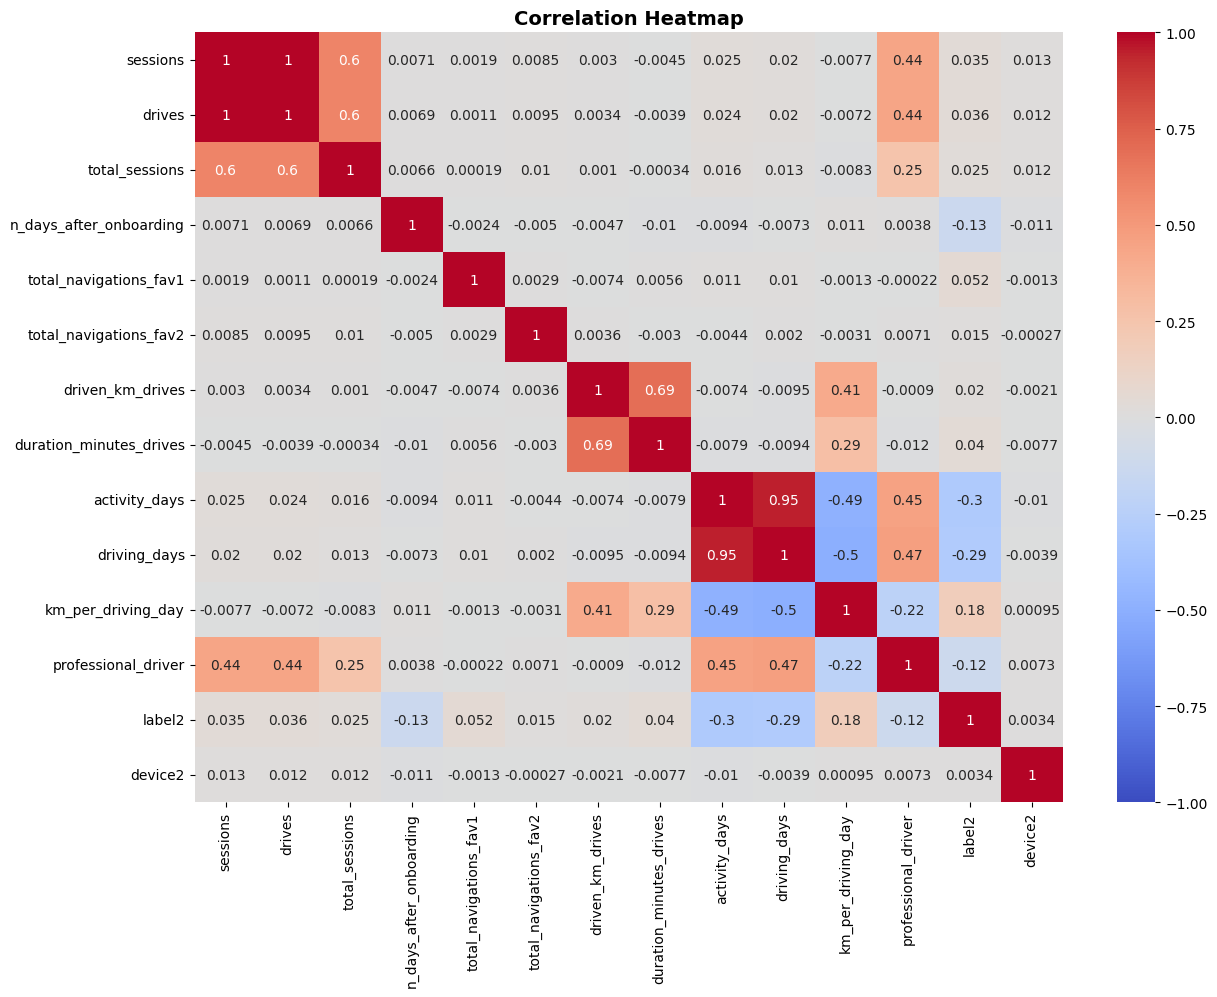

In [18]:
# Plot correlation heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(df.corr(method='pearson', numeric_only=True),
            vmin=-1, vmax=1, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap', fontsize=14, weight='bold');

* If any independent variables exhibit a Pearson correlation coefficient greater than the absolute value of **0.7**, these variables are considered strongly multicollinear.

* To mitigate multicollinearity effects, it is recommended to include only one variable from the highly correlated set in the model to ensure parameter stability and interpretation.

* The specific choice of correlation threshold (**0.7** in our analysis) is arbitrary and can vary depending on industry standards or analytical preferences.

* In different industries, the threshold may vary; for example, it could be **0.6 or 0.8** depending on specific data characteristics and modeling requirements. However, for our case study, we will include only one variable from any pair of variables exhibiting a correlation coefficient greater than **0.7**

# **Assumptions of Logistic Regression:**

### 1. **Binary Outcome:**
The target variable (dependent variable) is **binary**, meaning it has only two possible outcomes.(Examples: 0/1, true/false, yes/no).

### 2. **Independent Observations:**
The observations in the dataset are **independent of each other**, meaning there should not be any dependence or autocorrelation between observations. This assumption involves **evaluating the data collection process** to ensure that each observation is collected independently and is not influenced by other observations.

### 3. **No Extreme Outliers:**
* Logistic regression is generally **robust to mild outliers** without significantly affecting model performance, but it **cannot handle extreme outliers effectively.**

* In logistic regression, the relationship between predictor variables and the log odds of the outcome is modeled using a sigmoid function, which helps mitigate the impact of mild outliers.

* However, extreme outliers can have a significant effect on the estimated coefficients of the model and reduce its accuracy.

### 4. **No Multicollinearity:**
* Multicollinearity occurs when two or more independent variables in the logistic regression model are highly correlated with each other. The assumption of **No Multicollinearity** states that no two independent variables should exhibit high correlation with each other.

* When independent variables are highly correlated, it becomes challenging for the model to distinguish the individual effects of each variable on the outcome, which leads to unreliable and less interpretable estimates.

* This assumption ensures that the estimates (coefficients) of the logistic regression model remain stable and interpretable.

### 5. **Linearity of Log Odds:**
Logistic regression assumes a linear relationship between the **log-odds (logit)** of the response variable and the predictor variables, which can be either continuous or discrete.

### **Which variables are multicollinear with each other?**
* **`sessions`** & **`drives`** : **1.0**
* **`driving_days`** & **`activity_days`** : **0.95**

For this case study, we will exclude **`sessions`** and **`driving_days`** from our model. Instead, we will include **`drives`** and **`activity_days`** as predictors, as they exhibit slightly stronger correlations with the target variable.

# **Determine whether assumptions have been met**
* Our target variable is **binary**, and the observations in our dataset are independent.

* We have addressed the presence of outliers through imputation, thereby fulfilling the assumption related to extreme outliers.

* To manage multicollinearity, we will include only one variable from the pairs exhibiting high correlation. The final assumption regarding the linearity of log odds will be verified after the modeling process.




# **Model Building**
## **Assign predictor variables and target**

In [19]:
# Isolate predictor variables
X = df.drop(columns = ['label', 'label2', 'device', 'sessions', 'driving_days'])

# Isolate target variable
y = df['label2']

## **Split the Data**

Using **train_test_split** with the **stratify=y** parameter ensures that the split maintains the same proportion of classes as in the original dataset **y**. This means that the data will be split while preserving the ratio of the two classes (**retained vs. churned**) in both the training and testing sets.

The default split ratio in **train_test_split** is **75%** for training and **25%** for testing. For our case, we will keep this default ratio unchanged.

In [20]:
# Perform the train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

# Display `X_train`
X_train.head()

drives  total_sessions  n_days_after_onboarding  \
152       108      186.192746                     3116   
11899       2        3.487590                      794   
10937     139      347.106403                      331   
669       108      455.439492                     2320   
8406       10       89.475821                     2478   

       total_navigations_fav1  total_navigations_fav2  driven_km_drives  \
152                       243                     124       8898.716275   
11899                     114                      18       3286.545691   
10937                       4                       7       7400.838975   
669                        11                       4       6566.424830   
8406                      135                       0       1271.248661   

       duration_minutes_drives  activity_days  km_per_driving_day  \
152                4668.180092             24          612.305861   
11899              1780.902733              5         2258.494484   
10937              2349.305267             15          616.736581   
669                4558.459870             18          410.401552   
8406                938.711572             27           74.779333   

       professional_driver  device2  
152                      1        1  
11899                    0        1  
10937                    0        0  
669                      1        1  
8406                     0        1

## **Fit the model on X_train and y_train**

In [21]:
# Fit the model on X_train and y_train
model = LogisticRegression(penalty='none', max_iter=400)
model.fit(X_train, y_train)

LogisticRegression(max_iter=400, penalty='none')

## **Get the Coefficients of each Variable**

In logistic regression, the **coefficients** represent the change in the **log odds (logit)** of the **target variable** associated with a **one-unit increase** in the corresponding **predictor variable** (**X**), holding all other variables constant.

In [22]:
# Coefficient for all the variables
pd.Series(model.coef_[0], index=X.columns)

drives                     0.001900
total_sessions             0.000305
n_days_after_onboarding   -0.000410
total_navigations_fav1     0.001219
total_navigations_fav2     0.000902
driven_km_drives          -0.000021
duration_minutes_drives    0.000108
activity_days             -0.105008
km_per_driving_day         0.000071
professional_driver       -0.001417
device2                   -0.001193
dtype: float64

## **Get the Intercept of the Model**

In [23]:
# Intercept
model.intercept_

array([-0.0019709])

## **Check the Final Assumption: Linearity of Log Odds**

First, we will use the model's **predict_proba()** method to calculate the predicted probabilities of the target variable for each sample in the training data.



In [24]:
# Get the predicted probabilities of the training data
training_probabilities = model.predict_proba(X_train)
training_probabilities

array([[0.94106759, 0.05893241],
       [0.60111819, 0.39888181],
       [0.7664848 , 0.2335152 ],
       ...,
       [0.91946803, 0.08053197],
       [0.84832838, 0.15167162],
       [0.93665337, 0.06334663]])

The result stored in **training_probabilities** will be a **2-D array** where each row represents a user from **X_train**. The first column corresponds to the probability of the user not churning (**retained**), and the second column corresponds to the probability of the user churning.

In logistic regression, the relationship between a predictor variable and the dependent variable does not need to be linear. However, the log-odds (logit) of the dependent variable with respect to the predictor variable should exhibit a linear relationship.

**Here is the formula for calculating log-odds:**

$$
\text{logit}(p) = \ln\left( \frac{p}{1-p} \right)
$$

* $p$ represents the probability of an event occurring  (the probability that a user will churn).

* $\left( \frac{p}{1-p} \right)$ represents the odds of the event occurring, where $1-p$ is the probability of the event not occurring (the probability that a user will not churn).

* $\text {ln}$ denotes the natural logarithm.

The output of the logit function is the **natural logarithm of the odds ratio**, which range from **negative infinity** to **positive infinity (-∞ to +∞)**. In simplified terms, it represents the ratio of the probability of the event occurring to the probability of the event not occurring.

## **Create New Column `Logit`**

In [25]:
# Copy the `X_train` dataframe and assign to `logit_data`
logit_data = X_train.copy()

# Create a new `logit` column in the `logit_data` data frame
logit_data['logit'] = [np.log(prob[1] / prob[0]) for prob in training_probabilities]

In [26]:
logit_data.head()

drives  total_sessions  n_days_after_onboarding  \
152       108      186.192746                     3116   
11899       2        3.487590                      794   
10937     139      347.106403                      331   
669       108      455.439492                     2320   
8406       10       89.475821                     2478   

       total_navigations_fav1  total_navigations_fav2  driven_km_drives  \
152                       243                     124       8898.716275   
11899                     114                      18       3286.545691   
10937                       4                       7       7400.838975   
669                        11                       4       6566.424830   
8406                      135                       0       1271.248661   

       duration_minutes_drives  activity_days  km_per_driving_day  \
152                4668.180092             24          612.305861   
11899              1780.902733              5         2258.494484   
10937              2349.305267             15          616.736581   
669                4558.459870             18          410.401552   
8406                938.711572             27           74.779333   

       professional_driver  device2     logit  
152                      1        1 -2.770624  
11899                    0        1 -0.410126  
10937                    0        0 -1.188568  
669                      1        1 -2.100115  
8406                     0        1 -3.564052

Now, we will create **regression plots** (regplots) for each **continuous** and **discrete** independent variable, excluding **`device2`** as it is a categorical variable.

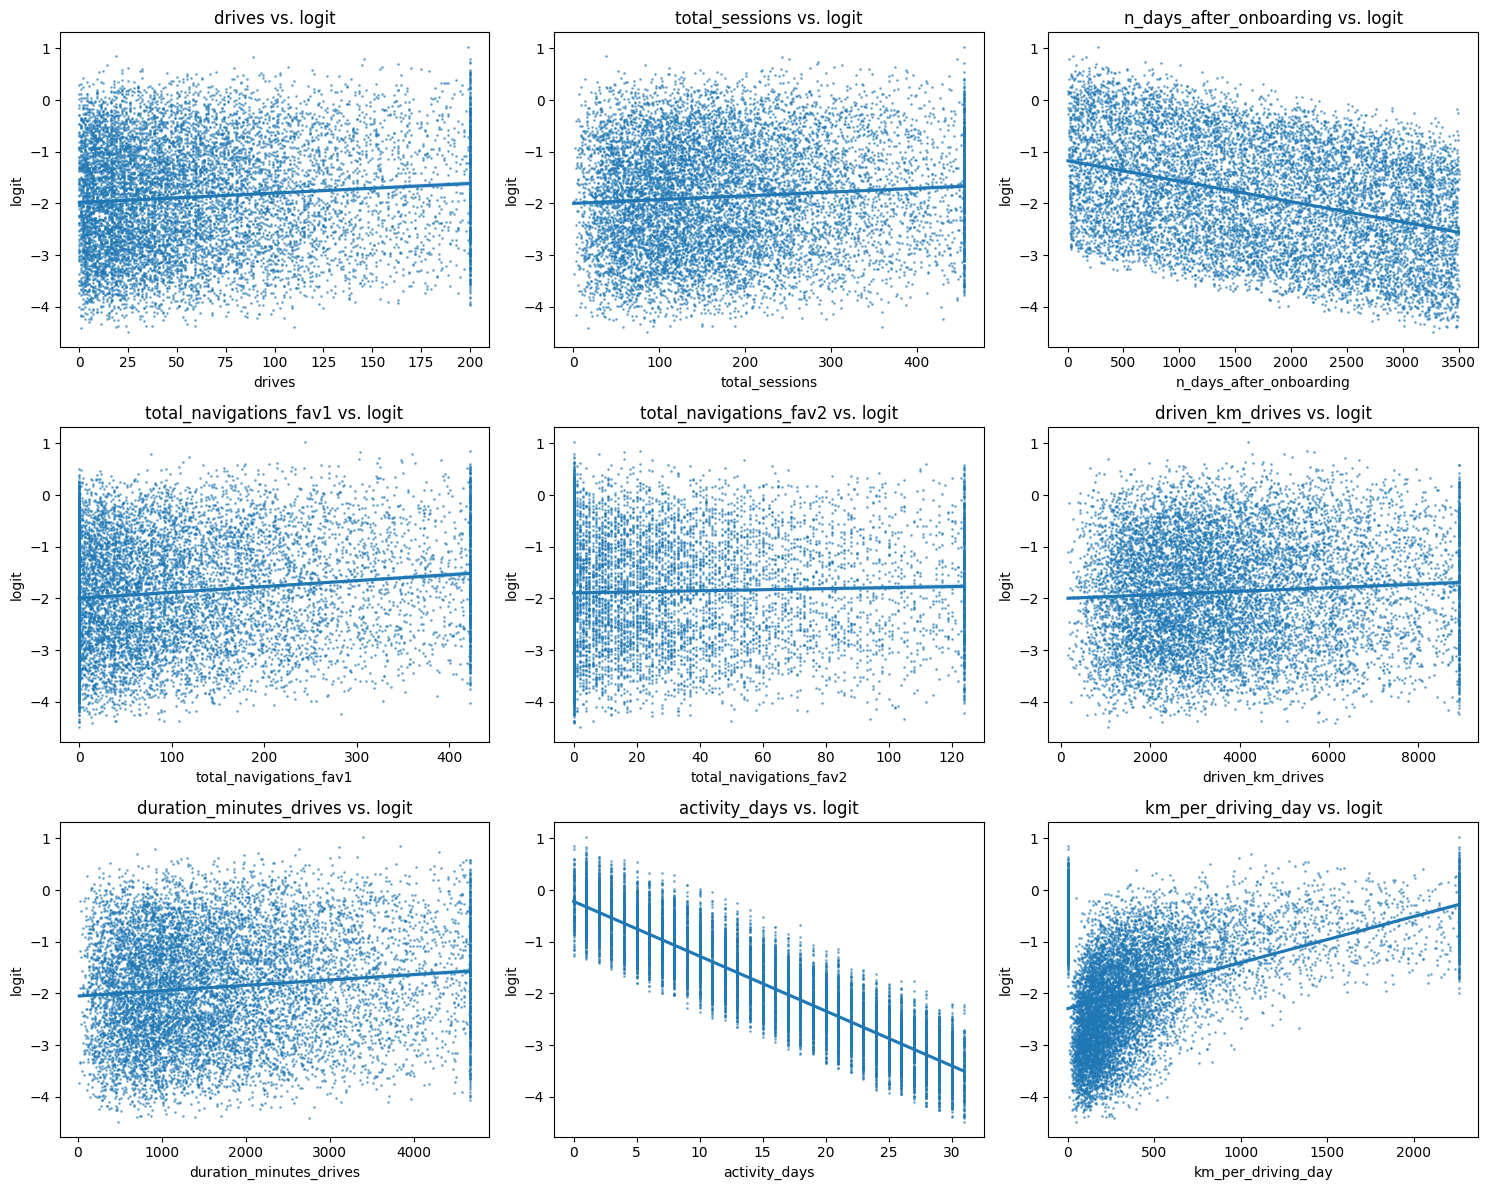

In [27]:
# Define the variables you want to plot against 'logit'
variables = ['drives', 'total_sessions', 'n_days_after_onboarding',
             'total_navigations_fav1', 'total_navigations_fav2',
             'driven_km_drives', 'duration_minutes_drives',
             'activity_days', 'km_per_driving_day']

# Set up subplots
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 12))
axes = axes.flatten()  # Flatten the axes array to iterate over them

# Loop through each variable and plot
for i, var in enumerate(variables):
    ax = axes[i]
    sns.regplot(x=var, y='logit', data=logit_data, ax=ax, scatter_kws={'s': 1, 'alpha': 0.5})
    ax.set_title(f'{var} vs. logit')
    ax.set_xlabel(var)
    ax.set_ylabel('logit')

# Adjust layout and show plot
plt.tight_layout()
plt.show()

* The linearity assumption of log-odds is not met for any of the independent variables.

In real-world scenarios, data often deviates from ideal assumptions, leading to violations of modeling assumptions. Logistic regression demonstrates reasonable robustness to moderate violations, allowing it to still offer valuable insights and reasonable predictions. The impact of assumption violations varies depending on their severity; while some may have minimal or no effect on the model's performance, others can lead to failure of the model.



# **Results & Evaluation**

In [28]:
# Generate predictions on X_test
y_preds = model.predict(X_test)
y_preds

array([0, 0, 0, ..., 0, 0, 0])

In [29]:
# Score the model (accuracy) on the test data
model.score(X_test, y_test)

0.8237762237762237

The default scoring metric in **scikit-learn** is **accuracy**, which may not be suitable for our imbalanced dataset. Given the imbalance, we should prioritize evaluation metrics such as **precision**, **recall**, and **F1 score** to assess our model's performance effectively.

# **Show Results with a Confusion Matrix**

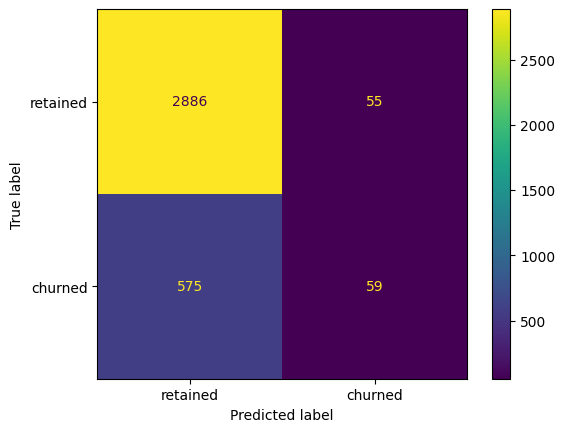

In [30]:
# Confusion matrix
cm = confusion_matrix(y_test, y_preds)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels=['retained', 'churned'])
disp.plot();

* **True Negative (TN): 2886**
  * These are the instances correctly predicted as not churned by the model.
  * In our case, the model accurately identified **2886** **retained** users.

* **False Positive (FP): 55**
   * These are instances where the model incorrectly predicted as **"churned"** when the actual outcome was **"retained"**.

* **False Negative: 575**
  * These instances represent cases where the model predicted **"retained"**, but the actual outcome was **"churned"**, indicating a significant number of **false negatives**.

* **True Positive: 59**
  * These are instances where the model correctly identified **59 churned users**, which is **significantly fewer** compared to the number of **false negatives**.



We can use the **confusion matrix** to compute **precision** and **recall** manually. Alternatively, we can also leverage **scikit-learn's classification_report()** function, which generates a comprehensive table using **y_test** and **y_preds**.

In [31]:
# Calculate precision manually
precision = cm[1, 1] / (cm[0, 1] + cm[1, 1])
precision

0.5175438596491229

In [32]:
# Calculate recall manually
recall = cm[1, 1] / (cm[1, 0] + cm[1, 1])
recall

0.09305993690851735

In [33]:
# Create a classification report
target_labels = ['retained', 'churned']
print(classification_report(y_test, y_preds, target_names=target_labels))

              precision    recall  f1-score   support

    retained       0.83      0.98      0.90      2941
     churned       0.52      0.09      0.16       634

    accuracy                           0.82      3575
   macro avg       0.68      0.54      0.53      3575
weighted avg       0.78      0.82      0.77      3575



* The precision of **0.52** for the churned class indicates that when the model predicts a customer as **"churned"**, it is correct about **52%** of the time. However, this precision value also reveals a notable **false positive rate**, implying that approximately **48%** of the predicted churned cases are actually not churned.

* The recall of **0.09** for the churned class indicates that the model captures only **9%** of the actual churned cases. This low recall value suggests that the model **misses a significant portion of true churned users**, failing to identify most of the users who have actually churned.


* The combination of **moderate precision** (**0.52**) and significantly **low recall** (**0.09**) highlights a substantial rate of misclassification, indicating that the model is experiencing challenges in accurately classifying churned users.

Overall, the model's performance highlights the need to enhance its ability to accurately identify churned users, reduce false negative, and improve recall performance.


# **Coefficients for each Feature**


In [34]:
# Coefficients for each feature
coefficients = model.coef_[0]

# Feature names
feature_names = X_train.columns

# Create a Pandas Series
feature_importance = pd.Series(coefficients, index=feature_names).sort_values(ascending=True)
feature_importance

activity_days             -0.105008
professional_driver       -0.001417
device2                   -0.001193
n_days_after_onboarding   -0.000410
driven_km_drives          -0.000021
km_per_driving_day         0.000071
duration_minutes_drives    0.000108
total_sessions             0.000305
total_navigations_fav2     0.000902
total_navigations_fav1     0.001219
drives                     0.001900
dtype: float64

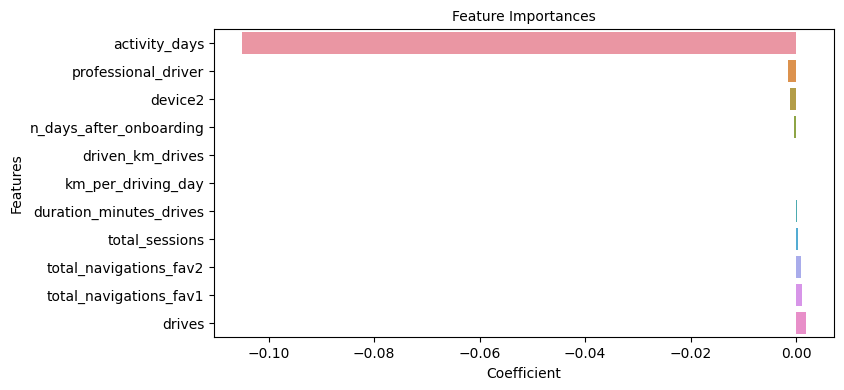

In [35]:
# Plot bar graph for feature importances
plt.figure(figsize=(8, 4))
sns.barplot(x=feature_importance.values, y=feature_importance.index)
plt.title('Feature Importances', size=10)
plt.xlabel('Coefficient')
plt.ylabel('Features')
plt.show()

* From the feature importance analysis, **`activity_days`** emerges as the most influential predictor for churn, exhibiting a **negative correlation**. This implies that an increase in **`activity_days`** is associated with a reduced likelihood of churn. This finding aligns with our prior **[Exploratory Data Analysis (EDA)](https://www.kaggle.com/code/lekhatopil/waze-exploratory-data-analysis)**, where we observed that users who engage with the app daily or more frequently tend to exhibit **lower churn rates**.

* A positive coefficient for the **`drives`** feature suggests that an increase in the number of drives is associated with an increase in the likelihood of churn. This means that users who have a higher number of drives are predicted to be more likely to churn

* A negative coefficient for the **`professional_driver`** feature in a logistic regression model suggests that users classified as professional drivers (meeting specific criteria like **60** or more drives and driving on **15+ days** in the last month) are less likely to churn. In other words, being classified as a professional driver is associated with a decrease in the likelihood of churn according to the model.

# **Questions**
## **1. Were there any variables that you expected to be stronger predictors than they were?**
* Yes. In our prior **[Exploratory Data Analysis (EDA)](https://www.kaggle.com/code/lekhatopil/waze-exploratory-data-analysis)**, **`km_per_driving_day`** exhibited a notable **positive correlation** with the target variable, leading us to anticipate that it would play a significant role in predicting churn within our logistic regression model.

* However, the logistic regression model's feature importance rankings revealed that **`km_per_driving_day`** was unexpectedly ranked as the **second least influential feature**.

* This discrepancy was striking, especially considering that **`km_per_driving_day`** was the only variable that demonstrated a strong positive correlation with churn compared to other predictors.

This outcome suggests that while **`km_per_driving_day`** showed a strong relationship with churn in our **[EDA](https://www.kaggle.com/code/lekhatopil/waze-exploratory-data-analysis)**, logistic regression may not have fully captured its predictive power within the model. This highlights potential limitations of logistic regression in capturing complex relationships and underscores the need for further investigation into the impact of **`km_per_driving_day`** on churn prediction.


## **2. Why might a variable you thought to be important not be important in the model?**
* In logistic regression models, the importance of a variable may not align with initial expectations due to factors like **interaction effects** and the **trade-off between model complexity and interpretability**.

* Features can interact with each other, meaning the effect of one variable on the target outcome depends on the value of another variable.

* Variables that seem crucial in isolation may lose their significance when considered alongside other features. This creates complex relationships where the influence of a single variable on the outcome is not straightforward and can result in surprising or counterintuitive results.

* Logistic regression models aim to balance predictive accuracy with interpretability. As the model captures more complex relationships, such as interactions between variables, it becomes more predictive but also more challenging to interpret. Therefore, certain variables may appear less important or exhibit unexpected effects in the model output.

## **3. Would you recommend that Waze use this model? Why or why not?**
Based on the model's performance metrics, particularly the **low recall** and **modest precision** for predicting churned users, deploying this model for critical business decisions may not be advisable. Instead, leveraging the model for further exploration and refinement could be valuable. Using the insights gained from the model, iterative improvements can be made to enhance its predictive capabilities over time.

## **4. What additional features would you like to have to help improve the model?**
* To improve our ability to predict user churn, we should gather data on usage patterns, including the **times of day** and **days of the week** when users are most or least active.

* We also need access to **location history** to identify **common routes**, and **frequent destinations.**

* Additionally, collecting **feedback and reviews** will help us assess user satisfaction levels, pain points, and understand the reasons behind user dissatisfaction.

Gathering and analyzing this information will enhance our understanding of user behavior and improve our churn prediction capabilities.


## **5. What will your next step?**
Our next step will be to build **tree-based ensemble models** like **Random Forest** and **XGBoost** to predict user churn. These models are often more accurate predictors because they make fewer assumptions about the underlying distributions of predictor variables. They are robust to outliers and missing data, and they excel in handling nonlinear relationships in the data. This approach will likely provide improved performance in predicting user churn compared to logistic regression.

